In [6]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

# Read in the data

df = pd.read_csv(r'C:\Users\steve\OneDrive\Documents\portfolio projects/movies.csv')

In [5]:
# Let's look at the data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [12]:
# Let's check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [10]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [18]:
# Let's change data type of columns

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 
df['votes'] = pd.to_numeric(df['votes'], errors='coerce').fillna(0).astype(int) 
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce').fillna(0).astype(int) 

In [62]:
df.head()

name  rating  genre  year  released  score    votes  director  writer  \
0  6504       6      6  1980      1681    8.4   927000      2541    3958   
1  5496       6      1  1980      1468    5.8    65000      2230    1611   
2  5073       4      0  1980      1747    8.7  1200000      1091    2533   
3   282       4      4  1980      1468    7.7   221000      1276    1974   
4  1016       6      4  1980      1519    7.3   108000      1035     511   

   star  country    budget      gross  company  runtime  yearcorrect  
0  1019       54  19000000   46998772     2269      146            2  
1   314       55   4500000   58853106      709      104            2  
2  1705       55  18000000  538375067     1502      124            2  
3  2194       55   3500000   83453539     1765       88            2  
4   396       55   6000000   39846344     1732       98            2

In [21]:
#Let's create Year column
df['yearcorrect'] = df['released'].astype(str).str.split().str[2]


In [63]:
df.head()

name  rating  genre  year  released  score    votes  director  writer  \
0  6504       6      6  1980      1681    8.4   927000      2541    3958   
1  5496       6      1  1980      1468    5.8    65000      2230    1611   
2  5073       4      0  1980      1747    8.7  1200000      1091    2533   
3   282       4      4  1980      1468    7.7   221000      1276    1974   
4  1016       6      4  1980      1519    7.3   108000      1035     511   

   star  country    budget      gross  company  runtime  yearcorrect  
0  1019       54  19000000   46998772     2269      146            2  
1   314       55   4500000   58853106      709      104            2  
2  1705       55  18000000  538375067     1502      124            2  
3  2194       55   3500000   83453539     1765       88            2  
4   396       55   6000000   39846344     1732       98            2

In [26]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

name     rating      genre  \
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6311                                    Despicable Me 2         PG  Animation   
6905                                    The Jungle Book         PG  Adventure   
7051                     Jumanji: Welcome to the Jungle      PG-13     Action   
6

In [25]:
pd.set_option('display.max_rows', None)

In [28]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [29]:
df = df.dropna()

<function matplotlib.pyplot.show(close=None, block=None)>

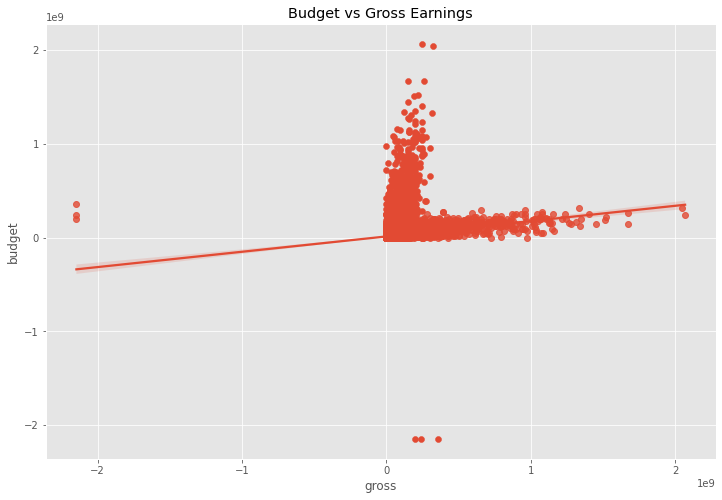

In [35]:
# Scatter plot with budget vs gross 

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')

sns.regplot(x="gross", y="budget", data=df)

plt.show

<AxesSubplot:xlabel='gross', ylabel='budget'>

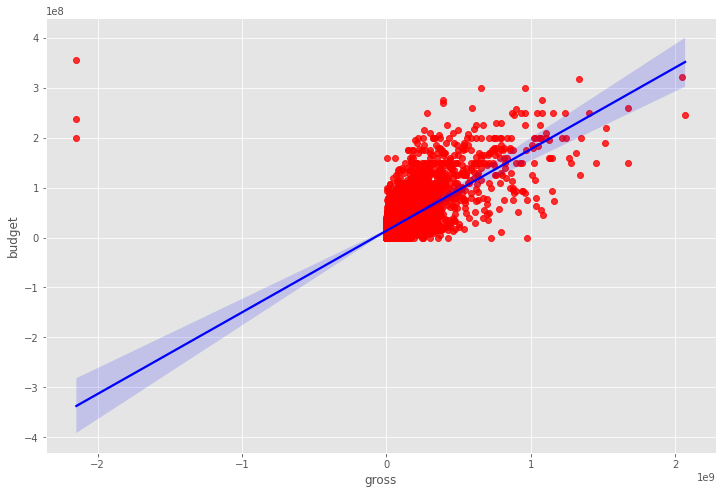

In [38]:
# Plot budget vs gross using seaborn

sns.regplot(x='gross', y='budget', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"}) 

In [40]:
# Let's start looking at correlation



In [41]:
df.corr(method='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.102688  0.226628  0.314708  0.258834  0.119674
score    0.102688  1.000000  0.412378  0.057093  0.171443  0.400880
votes    0.226628  0.412378  1.000000  0.485203  0.573821  0.308914
budget   0.314708  0.057093  0.485203  1.000000  0.687237  0.269151
gross    0.258834  0.171443  0.573821  0.687237  1.000000  0.203277
runtime  0.119674  0.400880  0.308914  0.269151  0.203277  1.000000

In [43]:
df.corr(method='kendall')

year     score     votes    budget     gross   runtime
year     1.000000  0.070840  0.338889  0.214875  0.220745  0.096832
score    0.070840  1.000000  0.304750 -0.003991  0.091724  0.284594
votes    0.338889  0.304750  1.000000  0.436271  0.557561  0.198439
budget   0.214875 -0.003991  0.436271  1.000000  0.539055  0.177355
gross    0.220745  0.091724  0.557561  0.539055  1.000000  0.174836
runtime  0.096832  0.284594  0.198439  0.177355  0.174836  1.000000

In [44]:
df.corr(method='spearman')

year     score     votes    budget     gross   runtime
year     1.000000  0.103719  0.482417  0.299715  0.321519  0.142529
score    0.103719  1.000000  0.434549 -0.005757  0.134201  0.401280
votes    0.482417  0.434549  1.000000  0.600687  0.749924  0.290638
budget   0.299715 -0.005757  0.600687  1.000000  0.713756  0.248918
gross    0.321519  0.134201  0.749924  0.713756  1.000000  0.253824
runtime  0.142529  0.401280  0.290638  0.248918  0.253824  1.000000

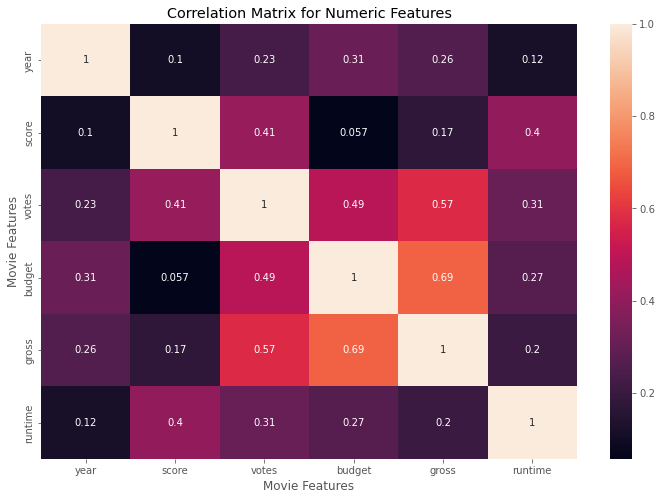

In [50]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Features")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")
plt.show()

In [64]:
#Let's look at Company

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()


name  rating  genre  year  released  score    votes  director  writer  \
0  6504       6      6  1980      1681    8.4   927000      2541    3958   
1  5496       6      1  1980      1468    5.8    65000      2230    1611   
2  5073       4      0  1980      1747    8.7  1200000      1091    2533   
3   282       4      4  1980      1468    7.7   221000      1276    1974   
4  1016       6      4  1980      1519    7.3   108000      1035     511   

   star  country    budget      gross  company  runtime  yearcorrect  
0  1019       54  19000000   46998772     2269      146            2  
1   314       55   4500000   58853106      709      104            2  
2  1705       55  18000000  538375067     1502      124            2  
3  2194       55   3500000   83453539     1765       88            2  
4   396       55   6000000   39846344     1732       98            2

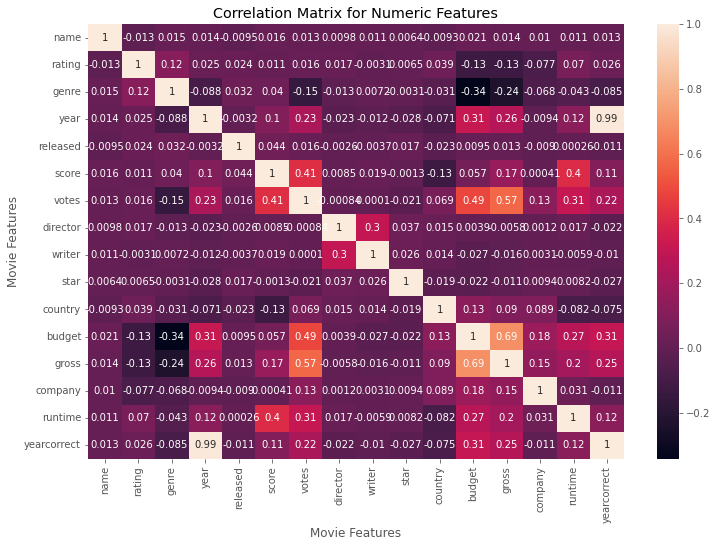

In [56]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Features")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")
plt.show()

In [58]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.012552
             genre          0.015035
             year           0.013659
             released      -0.009471
             score          0.015633
             votes          0.013310
             director       0.009792
             writer         0.010536
             star           0.006384
             country       -0.009314
             budget         0.021054
             gross          0.013894
             company        0.010093
             runtime        0.011210
             yearcorrect    0.012775
rating       name          -0.012552
             rating         1.000000
             genre          0.117769
             year           0.024570
             released       0.024425
             score          0.011324
             votes          0.016114
             director       0.016980
             writer        -0.003125
             star           0.006474
             country        0.038501
 

In [59]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.341915
genre        budget        -0.341915
gross        genre         -0.235852
genre        gross         -0.235852
votes        genre         -0.148136
genre        votes         -0.148136
score        country       -0.129453
country      score         -0.129453
rating       gross         -0.128616
gross        rating        -0.128616
budget       rating        -0.126954
rating       budget        -0.126954
genre        year          -0.087850
year         genre         -0.087850
yearcorrect  genre         -0.084904
genre        yearcorrect   -0.084904
runtime      country       -0.082113
country      runtime       -0.082113
rating       company       -0.076940
company      rating        -0.076940
country      yearcorrect   -0.075377
yearcorrect  country       -0.075377
year         country       -0.070645
country      year          -0.070645
genre        company       -0.068484
company      genre         -0.068484
genre        runtime       -0.043406
r

In [61]:
high_corr = sorted_pairs[(sorted_pairs > 0.5)]

high_corr

gross        votes          0.573821
votes        gross          0.573821
budget       gross          0.687237
gross        budget         0.687237
year         yearcorrect    0.991924
yearcorrect  year           0.991924
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#Votes and Budget have the highest correlation to gross earnings